In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
import sys
print(sys.version)
import warnings

3.6.0 |Anaconda 4.3.1 (64-bit)| (default, Dec 23 2016, 12:22:00) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]


# Questão 1
Processo de Markov com 3 possíveis estados {0, 1, 2} e matriz de transição M :

\begin{array}{cccc}
   0.50 & 0.25 & 0.25 \\
   0.25 & 0.50 & 0.25 \\ 
   0.25 & 0.25 & 0.50 \\
  \end{array}

### Item A.

In [19]:
M = np.asarray(((0.5,0.25,0.25), (0.25,0.5,0.25), (0.25,0.25,0.5) ))
p0 = np.asarray((0.3, 0.4, 0.3))

M3 = np.linalg.matrix_power(M,2)
p3 = np.dot(M3,p0)
p3

array([ 0.33125,  0.3375 ,  0.33125])

### Item B.

In [44]:
def move(state, M, randomNb, printState=False):
    acc = 0
    if printState:
        print(M[:,state])
        
    for i in range(len(M[:,state])):
        acc = acc + M[i,state]
        if randomNb < acc:
            return i

state0 = 1
print('X(0) = {:d}\n'.format(state0))

state1 = move(state0, M, np.random.rand(), True)
print('X(1) = {:d}\n'.format(state1))

state2 = move(state1, M, np.random.rand(), True)
print('X(2) = {:d}\n'.format(state2))

state3 = move(state2, M, np.random.rand(), True)
print('X(3) = {:d}\n'.format(state3))

X(0) = 1

[ 0.25  0.5   0.25]
X(1) = 0

[ 0.5   0.25  0.25]
X(2) = 2

[ 0.25  0.25  0.5 ]
X(3) = 2



### Item C.

In [163]:
def moveNumpy(state, M, randomNb, printState=False):
    if printState:
        print(M[:,state])
        
    upperBound = M[:,state].cumsum(0)
    lowerBound = upperBound - M[:,state]
    
    greaterThanLowerBound = np.greater_equal(randomNb,lowerBound[:,np.newaxis])
    lowerThanUpperBound = np.less_equal(randomNb, upperBound[:,np.newaxis])

    newStateBool = np.logical_and(greaterThanLowerBound, lowerThanUpperBound)
    newState = np.where(newStateBool.T)[-1]
    
    return newState
       
def SimulateMarkov(M, nbStates, steps, trials):
    history = np.zeros((trials, steps+1))
    randomNbs = np.random.rand(trials, steps)
    state = np.random.randint(nbStates, size=trials)
    history[:,0] = state
    
    for step in range(steps):
        state = move(state, M, randomNbs[:, step])
        history[:,step+1] = state
    
    return history

markovChains = SimulateMarkov(M, 3, 3, int(1e7))
print('done')

done


### Item D

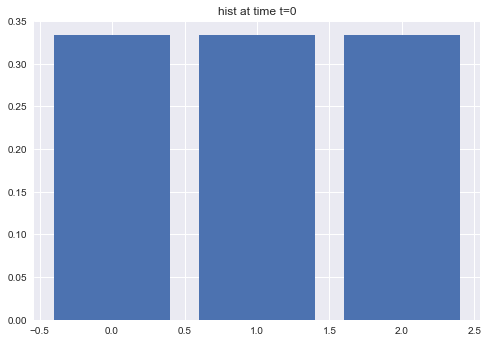

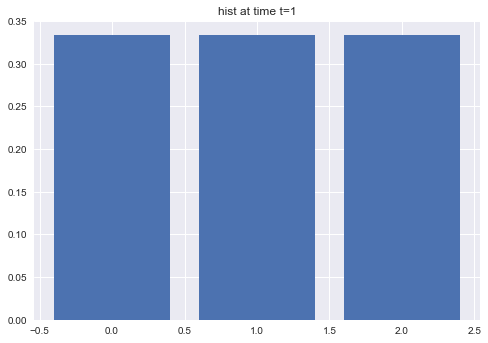

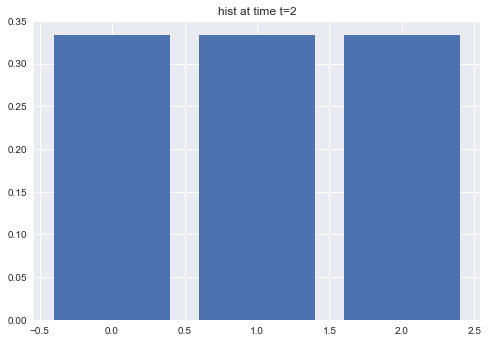

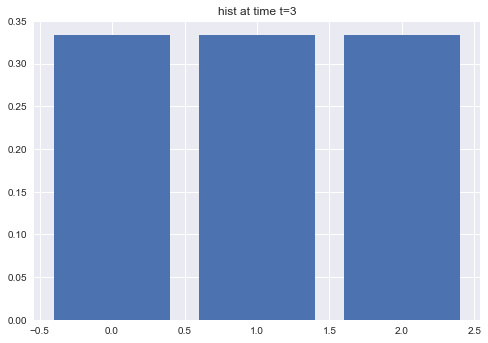

In [207]:
for time in range(markovChains.shape[1]):
    hist, bins = np.histogram(markovChains[:,time], bins=(0,1,2,3))
    width = 0.5 * (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2 - 0.5
    plt.bar(center, hist/markovChains.shape[0], align='center')
    plt.title('hist at time t={:d}'.format(time))
    plt.show()

# Questão 2

### Item A

In [93]:
N = 5
Jx = np.asarray((0.5, 0.2, 0.3, 0.1, 0.4))
T = 0.1

# calculate exp(-delta_J/T) pairwise
index = np.mgrid[0:N,0:N]
M = np.exp( ( Jx[index[1].ravel()] - Jx[index[0].ravel()] ) / T )

# force transition prob to 1 for lower energy states (delta_J < 1 -> exp(.) > 1)
M[M > 1] = 1 
M = M.reshape((N,N))

# prob to randomly pick a givn new state
M = M/(N)

# prob to remain in the same state is the remaining prob
M = M * (np.ones_like(M) - np.eye(M.shape[0]))
M[M == 0] = 1 - M.sum(0)

print(M)

[[ 0.2         0.00995741  0.02706706  0.00366313  0.07357589]
 [ 0.2         0.68939964  0.2         0.07357589  0.2       ]
 [ 0.2         0.07357589  0.49935706  0.02706706  0.2       ]
 [ 0.2         0.2         0.2         0.88573651  0.2       ]
 [ 0.2         0.02706706  0.07357589  0.00995741  0.32642411]]


### Item B

### Item C

### Item D

In [26]:
gibbs = np.exp(-Jx/T)
gibbs = gibbs/gibbs.sum()
print(gibbs)

[ 0.01165623  0.23412166  0.08612854  0.63640865  0.03168492]


### Item E